-------
Master-1 Sciences Pour l'Ingenieur: MF2A & CompMech   
## MEF03 - MFC: Cours de Mécanique des Fluides Compressibles 

_Jean-Camille Chassaing, Sorbonne Université (v1.4, Jan. 2021)_

http://www.dalembert.upmc.fr/home/chassaing

-------

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from IPython.display import Image
from scipy.optimize  import fsolve
from pylab           import *
import matplotlib.pyplot as plt
%matplotlib inline

-------

# Chap. II - Ecoulements compressibles Q1D  isentropiques

L'objectif de ce chapitre est de présenter les éléments théoriques permettant de décrire la dynamique des écoulements compressibles isentropiques dans les tuyères en régime stationnaire. De tels écoulements, dits d'**aérodynamique interne**, s'observent notamment dans les souffleries supersoniques telle que celle présentée dans la figure (1).

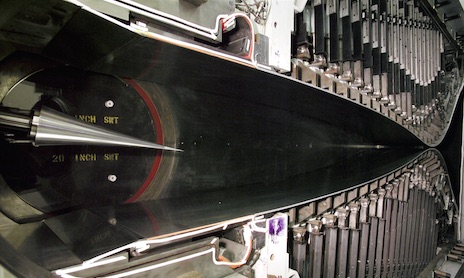

In [3]:
Image(filename='./figs/Mach5_SWT_tiny2.jpg')

## 1. Introduction

### 1.1 Cadre de l'étude

En première approximation, nous nous intéresserons par la suite à des écoulements monodimensionnels stationnaires de fluide parfait dans une conduite de section $A(x)$ variable suivant l'axe $x$. Les transferts de chaleur seront négligés ainsi que l'action des forces volumiques.

Deux configurations géométriques pouront être considérées :

$\bullet$ Ecoulement **monodimensionnel** : .........................

$\bullet$ Ecoulement **quasi-monodimensionnel** : .................................................. $ \quad(1.1a)$ 

où $h(x)$ désigne le rayon ou la hauteur de la veine et $R_c$ le rayon de courbure de la paroi.

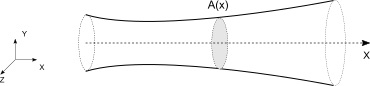

In [4]:
Image(filename='./figs/schematic_Q1D.jpg')

_Schéma d'une conduite à section circulaire, convergente puis divergente, pouvant être étudiée dans le cadre quasi-monodimensionnel._ 

**Conséquence:** on considèrera que toutes les variables du champs aérodynamiques sont ......................... sur une section $A(x)$ donnée de la tuyère, soit  : ....................................................................................................

### 1.2 Hypothèses

Le cadre applicatif des écoulements étudiés ci-après relève du jeu d'hypothèses suivant :

$\quad$ [H1] Le fluide est assimilé à un gaz **thermodynamiquement** et **calorifiquement parfait**.

$\quad$ [H2] Les effets diffusifs par agitation moléculaire sont négligés => Ecoulement **non-visqueux**.

$\quad$ [H3] Fluide non-pesant => pas d'effet ds forces de gravité

$\quad$ [H4] Mouvement permanent <=> ecoulement stationnaire

$\quad$ [H5] Ecoulement **1D ou Q1D** => $\
\underline V (\underline x) = U(x) \underline e_x$

In [5]:
#define gaz properties for air
gam = 1.3
r   = 287.05 #[r] = J/kg/K
cv  = r/(gam-1)
cp  = gam*cv

print('gaz properties for air:')
print('-----------------------')
print ('gam = %4.3f' %gam)
print ('r   = %4.3f' %r , ' J/kg/K')
print ('cv  = %4.3f' %cv , ' J/kg/K')
print ('cp  = %4.3f' %cp , 'J/kg/K')

gaz properties for air:
-----------------------
gam = 1.300
r   = 287.050  J/kg/K
cv  = 956.833  J/kg/K
cp  = 1243.883 J/kg/K


## 2. Equations de conservation

### 2.1 Modèle Euler 1D

Compte-tenu des hypothèses, les équations du mouvement sont décrites sous forme locale par le modèle Euler 1D suivant :

$\bullet$ **Continuité:** $ \qquad \qquad \quad d(\rho UA) = 0 \quad  \quad$  (2.1a)

$\bullet$ **Quantité de mouvement:**  $ \rho U dU = -dP \quad  \quad$(2.1b)

$\bullet$ **Energie:** $ \qquad \qquad \quad \quad \rho C_p dT = dP \quad  \quad$ (2.1c)

où les grandeurs $P$, $\rho$, $T$, $a$, qui caractérisent les propriétés physiques d'une particule fluide repérée par son unique coordonnée $x$, sont appelées grandeurs ......................... 

_Remarque_: Ces 3 relations se démontrent aisemment en appliquant les équations du modèle Navier-Stokes sous forme **integrale** à un volume de contrôle correspondant à un morceau de section de la conduite, définie par les abscisses amont $x$ et aval $x+dx$ (C'est très bon exercice de mécanique des fluides **à faire la la maison pour réviser !**). 

### 2.2  Expression des différentielles logarithmiques

Les expression des différentielles logarithmes des variables du champ de l'écoulement permettent de décrire explicitement leur variation en fonction de celle de la géométrie,
connaissant le nombre de Mach **.........................** :

**Vitesse :** $\displaystyle \frac{dU}{U} = \frac{1}{M^2-1} \frac{dA}{A}\qquad \qquad \qquad$    (2.2a)

**Masse volumique :** $\displaystyle \frac{d\rho}{\rho} = - \frac{M^2}{M^2-1} \frac{dA}{A}\qquad  \quad$ (2.2b)

**pression :** $\displaystyle \frac{dP}{P} = -\gamma \frac{M^2}{M^2-1} \frac{dA}{A} \qquad  \qquad  \quad$(2.2c)

**Température :** $\displaystyle \frac{dT}{T} = -(\gamma-1) \frac{M^2}{M^2-1} \frac{dA}{A}\qquad$   (2.2d)

**Nombre de Mach :** $\displaystyle \frac{dM}{M} = \frac{2+(\gamma-1) M^2}{2(M^2-1)} \frac{dA}{A}\quad$    (2.2e)

**Tableau de Variation** :

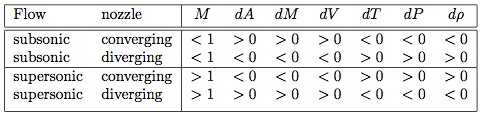

In [6]:
Image(filename='./figs/isentropic_flow_v1.jpg')

On remarque notamment à partir de (2.2a) que si $M=1$ alors $dA=0$, ce qui correspond à un **.........................** de section de la tuyère que l'on appelle le **.........................**.

Lorsque le nombre de Mach local est subsonique, une contraction de veine entraîne une augmentation de la vitesse de l'écoulement et une diminution de la pression.

Par contre, en régime **supersonique**, une **contraction** de la veine a pour effet de **.........................** l'écoulement et **......................... la pression**, résultat pour le moins _contre-intuitif_ !

#### Démonstrations:

Les relations (2.2a-e) se démontrent à partir des équations de bilan sous forme locale (2.1a-c) complétées
de la loi d'état.



_**Relation 2.2a**_ : Calculons la différencelle logarithmique de l'equation de Laplace $\displaystyle \frac{P}{\rho^\gamma} = Cte$. On trouve alors :

$\displaystyle \frac{dP}{P} =$  ........................................................................... $(2.2f)$

Sachant que $a^2 = \gamma P/\rho$, l'équation (2.2f) permet d'écrire une relation entre $dP$ et $d\rho$ : 

$\displaystyle dP=$  ....................................................................................................

Reportant la relation précédente dans le bilan local de quantité de mouvement (2.1b), nous obtenons :

$\displaystyle UdU =$ .................................................................................................... $(2.2g)$

Par ailleurs, la forme développée de l'équation de conservation de la masse (2.1a) donne : 

$\displaystyle $  ........................................................................................ $(2.2h)$


On voit alors (cf 2.2a) que pour obtenir une relation entre $dU/U$ et $dA/A$, il suffit d'éliminer
la dérivée logarithmique de $d\rho/\rho$ entre (2.2g) et (2.2h).
D'après (2.2g) on tire 

$\displaystyle \frac{d\rho}{\rho} = $  ...........................................................................

qui, injectée dans (2.2h) permet d'aboutir à (2.2a).

_**Relation 2.2b**_ : Eliminant $dU/U$ entre (2.2a) et (2.2h), nous obtenons que :


$\displaystyle \frac{dA}{A} = $ ............................................................................ 

La relation (2.2b) est alors retrouvée après simplifications.

_**Relation 2.2c**_ : Sachant que pour un gaz parfait : $\displaystyle \frac{dP}{P} = \gamma  \frac{d\rho}{\rho}$, l'insertion dans (2.2b) conduit donc immédiatement à (2.2c).

_**Relation 2.2d**_ : Considérons l'équation d'état écrite à partir des dériviées logarithmiques :

$\displaystyle   \frac{P}{\rho T} = r  \Rightarrow $
 ...........................................................................$(2.2i)$. 

Eliminons tout d'abord $d\rho/\rho$ dans l'expression précédente au moyen de (2.2b), soit

$\displaystyle $  .................................................................................. $ (2.2j)$.

Puis éliminons $dP/P$ au moyen de (2.2c) :

$\displaystyle \frac{dT}{T} =$................................................................................. .


On retrouvre alors (2.2d) après quelques calculs élémentaires.

_** Relation 2.2e**_ : Pour exprimer $dM/M$ en fonction de $dA/A$, il faut considérer la définition du nombre de Mach à partir de sa dérivée logarithmique : $\displaystyle M=U/a \Rightarrow \frac{dM}{M} =$ ...........................................................................

## 3. Grandeurs Totales

### 3.1 Définition

Une grandeur **Totale** (pression, température, masse volume, vitesse du son, energie, enthapie) est associée à une particule fluide en observant sa valeur lorsque la vitesse de la particule fluide est ramenée à zéro ..................................................
On désignera par la suite les grandeurs totales par l'indice $_t$, tel que: $P_t({\bf x},t)$, $\rho_t({\bf x},t)$, $T_t({\bf x},t)$,...

Dans certains cas, les grandeurs totales peuvent s'observer physiquement (cas d'un point d'arrêt sur un cylindre par exemple)
mais elles seront la plus part du temps associée de manière **.........................** à une particule fluide en mouvement.


**RESULTAT 1:** Dans le cadre d'un écoulement quasi-1D stationnaire de fluide non-visqueux et non-pesant, la **température totale** est **.........................** dans toute la tuyère. On parle alors de **.........................de la température totale dans tout l'écoulement**.

_Démonstration:_

Eliminant le terme de gradient de pression entre les formes locales des équations de conservation de la quantité de mouvement (2.1b) et de l'énergie (2.1c), nous obtenons immédiatement 
que : 

$C_p dT + UdU = 0  ~~  \forall x \quad \quad (3.1a)$ 

soit encore : 

$d(C_p T) + d(U^2/2) = 0 ~~ \forall x$ car $C_p=C^{te} \quad \quad (3.1b)$ 

pour un gaz calorifiquement parfait. Par intégration, nous obtenons donc que : 

$\displaystyle C_p T + \frac{U^2}{2} =  C^{te} ~  \forall x\qquad (3.1c)$. 

Déslors, nous pouvons ré-écrire cette égalité en introduisant de manière "fictive" les grandeurs totales correspondantes (c'est à dire en considérant $U=0$, soit 

$\displaystyle$........................................................................... $(3.1d)$

ce qui permet de démontrer le résultat.

**RESULTAT 2:** Si l'écoulement est **.........................** alors **.........................** les grandeurs totales se conservent dans la tuyère.

### 3.2 Relations de l'écoulement isentropique

Les relations isentropiques des grandeurs totales permettent de relier, pour une section de l'écoulement donnée, la grandeur statique d'une variable à sa grandeur totale et au nombre de Mach de l'écoulement.

**Température :** $\displaystyle \frac{T_t}{T} = 1+ \frac{\gamma-1}{2} M^2 \qquad \qquad
\qquad(3.2a)$  
 
**Pression :** $\displaystyle \frac{P_t}{P} = \left[ 1+ \frac{\gamma-1}{2} M^2 \right]^{\frac{\gamma}{\gamma-1}} \qquad \qquad \quad(3.2b)$

**Masse volumique :** $\displaystyle \frac{\rho_t}{\rho} = \left[ 1+ \frac{\gamma-1}{2} M^2 \right]^{\frac{1}{\gamma-1}} \qquad (3.2c)$

**Vitesse du son :** $\displaystyle \frac{a_t}{a} = \left[ 1+ \frac{\gamma-1}{2} M^2 \right]^{\frac{1}{2}} \qquad  \quad(3.2d)$


_Démonstration:_

D'après (3.1d), et sachant que $C_p=\gamma r/(\gamma-1)$, on a : 
$\displaystyle \frac{T_t}{T} = 1 + \frac{\gamma-1}{\gamma r T} \frac{U^2}{2}$.

Les relations $a^2=\gamma r T$ et $M=U/a$ permettent alors de démontrer (3.2a).

Pour démontrer les (3.2b) et (3.2c), on utilise les rélations pour une transformation isentropique (voir Chap. 0 et TD1 de thermodynamique) en assimilant l'état (1) aux grandeurs statiques et l'état (2) aux grandeurs totales, d'où :

$\displaystyle \frac{P_t}{P} = \left( \frac{T_t}{T} \right)^{\frac{\gamma}{\gamma-1}}$
et
$\displaystyle \frac{P_t}{P} = \left( \frac{\rho_t}{\rho} \right)^\gamma$.

On retrouve alors (3.2b) puis (3.2c) en utilsant (3.2a)  à partir des relations précédentes.

**Fonctions python**

In [7]:
#status= validated (oct 2016 - jcc)
def func_Tt_T(gam,M):
    # total to static temperature
    out =  (1+0.5*(gam-1)*M**2)
    return out

def func_Pt_P(gam,M):
    # total to static pressure (LIB_ipynb = isentropic_flow_v2)
    out =  (1+0.5*(gam-1)*M**2)**(gam/(gam-1))
    return out

def func_Rt_R(gam,M):
    # total to static density
    out =  (1+0.5*(gam-1)*M**2)**(1/(gam-1))
    return out

**Interprétation graphique**

Text(0.8, 10.6, ' Fig. 1. : Relation de l ecoulement isentropique')

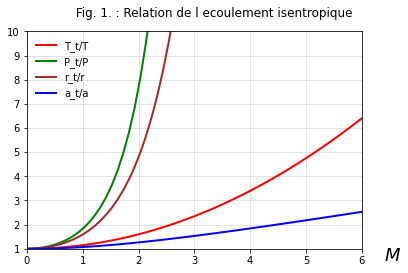

In [8]:
M = linspace(0, 6, num=60)
plt.ylim(1,10)
plt.xlim(0,6)
Tt_T = 1 + 0.5*(gam-1)*M**2
Pt_P = (Tt_T)**(gam/(gam-1))
rt_r = Tt_T**(1./(gam-1))
at_a = (Tt_T)**(0.5)
ax = plt.gca()
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.85')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.85')
plot(M,Tt_T,color="red", linewidth=2.0, linestyle="-", label="T_t/T")
plot(M,Pt_P,color="green", linewidth=2.0, linestyle="-", label="P_t/P")
plot(M,rt_r,color="brown", linewidth=2.0, linestyle="-", label="r_t/r")
plot(M,at_a,color="blue", linewidth=2.0, linestyle="-", label="a_t/a")
plt.legend(loc='upper left', frameon=False)
ax.text(6.4,0.5, '$M$',fontsize=18)
ax.text(0.8,10.6, ' Fig. 1. : Relation de l ecoulement isentropique',fontsize=12)
#ax.text(1.7,6.2, ' statiques pour une ODC droite',fontsize=12)
# Save figure using 72 dots per inch
# savefig("./figures/Jump_relation.png",dpi=72)

## 4 Grandeurs Critiques

**Définition:** Une grandeur **critique** correspond à toute valeur du champ de l'écoulement pour lequel la vitesse de la particule fluide est **.........................**. On identifiera alors les grandeurs critiques (ou encore appellées grandeurs soniques) par l'indice $c$, soit $P({\bf x})|_{U({\bf x})=a({\bf x})} \longrightarrow P_c$, ... 


**Résultat:** Les grandeurs critiques et totales sont reliées par : 

$\displaystyle \frac{T_t}{T_c} = \frac{\gamma +1}{2} ,\qquad$ 
$\displaystyle \frac{P_t}{P_c}       = \left( \frac{\gamma+1}{2} \right)^{\frac{\gamma}{\gamma-1}} , \qquad$ 
$\displaystyle \frac{\rho_t}{\rho_c} = \left( \frac{\gamma+1}{2} \right)^{\frac{1}{\gamma-1}}$.

_Démonstration:_

Il suffit de faire ............... dans les relations (3.2a-c).

### Calculette compressible isentropique

**Calcul direct :**

In [24]:
#status= validated (oct 2016 - jcc)
Mach = 3.3

#solve Jump relations
Tt_T = func_Tt_T (gam,Mach)
Pt_P = func_Pt_P (gam,Mach)
Rt_R = func_Rt_R (gam,Mach)

print ('Input : Mach = %4.3f'%Mach)
print ('\nIsentropic relations: ')
print ('Output: T_t/T = %4.3f'%Tt_T)
print ('Output: P_t/P = %4.3f'%Pt_P)
print ('Output: r_t/r = %4.3f'%Rt_R)

Input : Mach = 3.300

Isentropic relations: 
Output: T_t/T = 3.178
Output: P_t/P = 57.219
Output: r_t/r = 18.005


**Inversion des relations isentropiques :**  

In [23]:
#status= validated (oct 2016 - jcc)
#
def func_inv_Tt_T(x,gam,Tt_T):
    # total to static temperature
    out =  Tt_T - (1+0.5*(gam-1)*x**2)
    return out

def func_inv_Pt_P(x,gam,Pt_P):
    # total to static pressure
    out =  Pt_P - (1+0.5*(gam-1)*x**2)**(gam/(gam-1))
    return out

def func_inv_Rt_R(x,gam,rt_r):
    # total to static density
    out =  rt_r - (1+0.5*(gam-1)*x**2)**(1/(gam-1))
    return out

from scipy.optimize import fsolve

# input parameters
gam=1.4
Tt_T=4.
Pt_P=1./0.065/2.
Rt_R=5.
variable = 'Pt_P'
val_in   = Pt_P
initval  = 0.0639

#solve Mach number
#val = fsolve(func_inv_Tt_T, initval, args=(gam,Tt_T) )
val = fsolve(func_inv_Pt_P, initval, args=(gam,Pt_P) )
#val = fsolve(func_inv_Rt_R, initval, args=(gam,Rt_R) )

print ('Input :', variable, '       = %4.2f'%val_in)
print ('\nOutput: Mach number = %4.2f'%val[0]) 

Input : Pt_P        = 7.69

Output: Mach number = 1.99


## 5. Application aux tuyères de Laval

### 5.1 Relation fondamentale pour le débit massique

**Résultat:** Pour un écoulement 1D isentropique stationnaire, le débit massique $\dot m$ est constant pour tout $x$ et peut s'exprimer uniquement en fonction des grandeurs génératrices de la tuyère $T_{t_0}$ et $\rho_{t_0}$ , de la section $A(x)$ et du nombre de Mach local $M(x)$ :

$ \dot m = \sqrt{\gamma r T_{t_0}} \rho_{t_0} A(x) f(M)\quad $ avec $\quad \displaystyle f(M) = M(x) \left( 1+\frac{\gamma-1}{2}M(x)^2 \right) ^{-\frac{\gamma+1}{2(\gamma-1)}} \qquad (5.1a)$.

_Démonstration:_

Partons de l'expression du débit massique $\dot m$ pour un écoulement quasi 1D stationnaire : $\dot m = \rho(x) U(x) A(x)   = Cte \quad \forall x$.

Exprimant la vitesse en fonction du nombre de Mach et de la température statique, nous avons :

$\dot m =$ ..................................................

Maintenant, nous introduisons les quantités totales $\rho_t$ et $T_t$ à partir de leur définition (eq. 3.2)

$\dot m = $ .................................................. 

On retrouve alors la relation demandée dans le cas où l'écoulement est isentropique entre l'entrée  de la tuyère et la section considérée $A(x)$ (conservation des grandeurs totales $T_t$ et $\rho_t$).

**Résultat 2:** Dans ces conditions, le rapport entre la section de la tuyère et la section critique est donné par :

$\displaystyle \frac{A}{A_c} = \frac{1}{M(x)}
\left[
\frac{2}{\gamma+1}
\left( 1+\frac{\gamma-1}{2}M^2
\right)
\right]^{\frac{\gamma+1}{2(\gamma-1)}}
$

_Démonstration_ :

On part de la relation fondamentale du débit massique pour décrire la conservation de $\dot m$ entre la section courante $A$
et la section critique $A_c$ pour l'écoulement isentropique relatif à $A(x)$.

On écrit alors la conservation de $\dot m$ entre la section courante $A$ et la section courante mais pour des conditions soniques 
(section critique $A_c$, encore notée $A^*$), soit :

$\dot m = C^{te} \quad \Rightarrow  \rho U A =  \rho_c a_c A_c$

Explicitant cette relation au moyen de la relation fondamentale, on a donc :

.................................................................................................... .

Comme $\rho_{t_c}= \rho_{t}$ et  $T_{t_c}= T_{t}$, on aboutit à la relation (3) après simplifications.

Text(5.2, -0.1, '$Mach$')

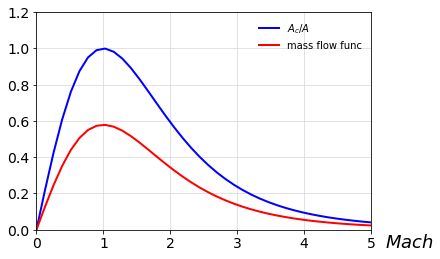

In [25]:
#import cmath
#Set limits
M_max = 5
plt.xlim(0,M_max)
plt.ylim(0,1.2)
#Plot
M_min = 0.
M = linspace(0, M_max, num=40)
c2= -0.5*(gam+1.)/(gam-1.)
Ac_over_A   = (M *(2./(gam+1)*(1.+0.5*(gam-1)*M**2))**c2)
mass_flow_f = M * (1.+0.5*(gam-1)*M**2)**c2

plot(M,Ac_over_A,color="blue", linewidth=2.0, linestyle="-", label="$A_c/A$")
plot(M,mass_flow_f,color="red", linewidth=2.0, linestyle="-", label="mass flow func")

plt.legend(loc='upper right', frameon=False)
#Set ticklabel font sizes
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(14)
ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.85')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.85')
ax.text(5.2,-0.1, '$Mach$',fontsize=18)
#ax.text(-3,70.7, '$nu$',fontsize=18)

 
 
 **Calculette compressible:** Calcul du Mach connaissant $A/A_c$

In [12]:
#status= Validated (oct 2016 - jcc)
def func_A_Ac(x,gam,A_Ac):
    # total to static temperature
    out =  A_Ac - 1./x * ( 2./(gam+1.) *(1. + 0.5*(gam-1)*x**2))**(0.5*(gam+1)/(gam-1))  
    return out

from scipy.optimize import fsolve

# input parameters
A_Ac= 1.6
variable = 'A_Ac'
val_in   = A_Ac
Mach_init= 0.5      # choose Mach_init according to the sub or supersonic branch

#solve Mach number
val = fsolve(func_A_Ac, initval, args=(gam,A_Ac) )

print ('Input :', variable, '       =', val_in)
#print ' '
print ('Output: Mach number = %4.2f'%val[0])

Input : A_Ac        = 1.6
Output: Mach number = 0.40


### 5.2 Diagramme de fonctionnement en régime isentropique

On considère une tuyère de section convergente-divergente dont la pression génératrice
est  $P_{t_0}$ (notée $P_0$ sur la figure). Lors de son fonctionnement, différents régimes d'écoulements **isentropiques** peuvent alors être observés (et calculés à partir des relations théoriques du cours) en fonction de pression statique imposée en sortie de tuyère $P_e$:

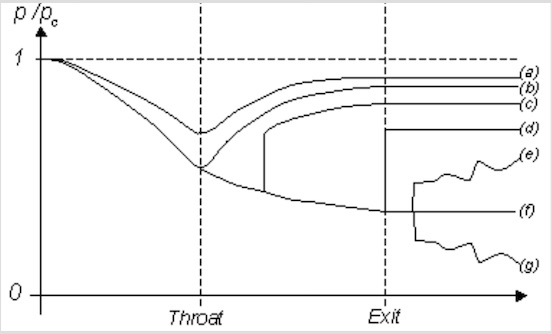

In [13]:
Image(filename='./figs/laval_prssr.jpg')

**Cas (a)**  $P_e/P_{t_0} \sim 1$ : La pression statique de sortie est légèrement inférieure à $P_{t_0}$. En vertu des relations (2.2a-d), l'écoulement accélère dans le convergent et sa pression diminue. Au passage du col, où le nombre de Mach est maximal $M_(x=x_{col})<1$, la pression augmente dans le divergent et l'écoulement déccélère. Le tuyère fonctionne donc comme un tube de Venturi et l'écoulement peut être considéré comme incompressible si $M_(x=x_{col})<0.3$. 

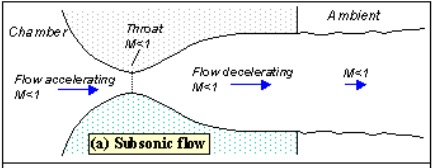

In [14]:
Image(filename='./figs/laval_a.jpg')

**Cas (b)** : L'augmentation de la différence de pression entre  $P_e$ et $P_{t_0}$ a pour conséquence d'augmenter   le niveau d'accélération de l'écoulement dans la partie convergente et donc d'augmenter la valeur de $M_(x=x_{col})$. On voit donc qu'il existe une valeur de la pression statique en sortie $P_e=P_e^{cas\_b}$ telle que le col de la tuyère sera sonique. En aval du col, l'écoulement restera subsonique et déccélèrera afin de satisfaire la condition de sortie $P_e=P_e^{cas\_b}$. L'écoulement dans le divergent est qualifié  de branche **.........................**.  

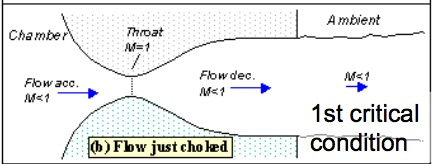

In [15]:
Image(filename='./figs/laval_b.jpg')

**Cas (f)** : Dans ce cas, la pression statique de sortie $P_e=P_e^{cas\_f}$ est très inférieure à la pression totale d'entrée. L'écoulement accélère tout d'abord dans le convergent jusqu'à être sonique au col, comme dans le $cas\_b$. 
la pression au col obtenue est encore très supérieure à $P_e$. Il faut donc que la pression continue de diminuer dans le divergent. Pour cela, le regime d'écoulement doit être **.........................** en vertu de (2.2c). On parle alors de branche **.........................**.

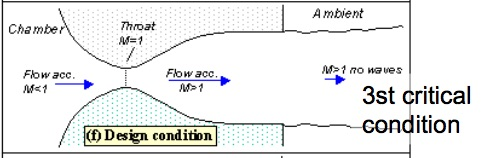

In [16]:
Image(filename='./figs/laval_f.jpg')


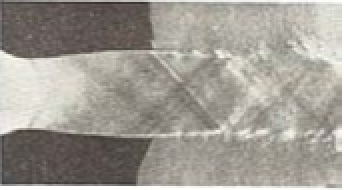

In [17]:
Image(filename='./figs/laval_exp_f.jpg')

_Remarque 1_ : Les régimes étudiés précédemment ($cas\_a,b,f$) relèvent de la classe d'écoulement **isentropiques** et peuvent être prédit au moyen du principe de **conservation de toutes les grandeurs totales** au sein de la tuyère. Cependant, nous n'avons pas étudié toutes les configurations possibles d'éecoulement. Ces autres situations, qui seront étudiées théoriquement dans le chapitre suivant, sont caractérisée par la présence de mécanismes **.........................**, à l'intérieur ou à l'extérieur de la tuyère : les **.........................** :

**Cas (c)** : Considérons désormais que $P_e={cas\_c}$ légèrement inférieure à $P_{cas\_b}$. L'écoulement dans le divergent est identique aux $cas\_b,f$ et le col est sonique. Dans le divergent, la pression doit encore diminuer car supérieure à $P_e={cas\_c}$.
L'écoulement doit forcément devenir supersonique aprés le col car sinon on obtiendrait une pression de sortie égale à $P_e^{cas\_b}$. Afin de récupérer la pression de sortie $P_e^{cas\_c}$ il faut donc que l'écoulement ralentisse et que la pression augmente. En vertu de (2.2a) et (2.2c), nous devons alors forcément observer une régime subsonique ($M<1$) afin de réaliser la deccélération. Nous verrons dans le chapitre suivant, que cette **.........................** de l'écoulement (passage de $M>1$ à $M<1$ s'apparente, au niveau, à une _discontinuité_ du champ de l'écoulement, appellée **.........................** (ODC). 

**Cas (d)** : La position $x_{choc}$ à laquelle l'ODC apparaît est fonction de la pression en sortie de tuyère $P_e$. Continuant de diminuer cette dernière à partir du $P_e ={cas\_c}$, la position de l'ODC va logiquement se décaler vers la sortie de la veine car l'accélération dans le divergent doit être plus prononcée afin  de satisfaire la condition $P_e<{cas\_c}$. Il existera donc une valeur de pression de sortie $P_e={cas\_d}$ telle que l'ODC s'observa au **niveau même de la section de sortie** dans le milieu ambiant. L'écoulement sera donc isentropique supersonique jusqu'à la section de sortie, mais pas dans toute le tuyère.

In [ ]:
Image(filename='./figs/laval_exp_d.jpg')

_Remarque 2_ : Nous vennons de voir que les valeurs possibles de la pression statique en sortie de veine $P_e$ ne **permettent pas** de couvrir une plage **.........................** de valeurs comprises entre
$P_e=P_e^{cas\_d}$ et $P_e=P_e^{cas\_f}$. Il n'est également pas possible d'observer strictement en sortie des valeurs de $P_e$ inférieures à la valeur donnée par la branche supersonique isentropique du $cas\_f$. 
En conséquence, l'écoulement de jet haute vitesse en sortie de tuyère et débouchant dans un milieu extérieur au repos peut être modifiéeafin de satisfaire aux conditions de pression extérieure $P_a$ correspondant à la pression atmosphérique par exemple.

**Cas (a,b,c,d,f)** : Si la pression atmosphérique est égale à l'une de ces configuration, alors le jet éjecté (zone de l'écoulement à haute vitesse) est dit en régime ** adapté**.
Ce dernier n'est soumis aux mécanimes de diffusion par effets visqueux et turbulent (hors du cadre de ce cours).

**Cas (e)** : Si la pression atmosphérique $P_a$ est comprise entre $P_e^{cas\_d}$ et $P_e^{cas\_f}$, on a que $P_e < P_a$ et donc l'ecoulement dans le jet extérieur va devoir subir différentes mécanismes compressibles 2D (ODC obliques, faisceaux de détente) afin de s'adapter à la pression atmosphérique $P_a$. Dans le cas présent où la $P_e < P_a$, le régime du jet est qualifié de **.........................**.

In [ ]:
Image(filename='./data_C2/laval_e.png') 

In [ ]:
Image(filename='./figs/laval_exp_e.jpg')

**Cas (g)** : Dans ce cas de figure, $P_e > P_a$ et la configuration du jet est dite **_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _**.

In [ ]:
Image(filename='./figs/laval_g.jpg')

In [ ]:
Image(filename='./figs/laval_exp_g.jpg')

_Remarque 3_ : Lorsque le col d'une tuyère est **sonique** (cad $M(x=x_{col})=1$), l'écoulement est dit **"........................."**. Si ce dernier est en plus supersonique dans **tout** le divergent, on dit alors que le régime de l'écoulement dans la tuyère est **.........................**.

## -- Fin de ce noteebook --

#### Références

[1] J.D. Anderson, "Modern Compressible Flow with Historical Perspective, Third Edition", McGRAW-HILL Ed.,ISBN 0-07-112161-7, 2003

#### Sitographie

[S1] https://archive.org/details/2004-L-00045


-------
Merci d'envoyer tout commentaire à jean-camille.chassaing@sorbonne-universite.fr
